# Titanic Travellers Survival Prediction

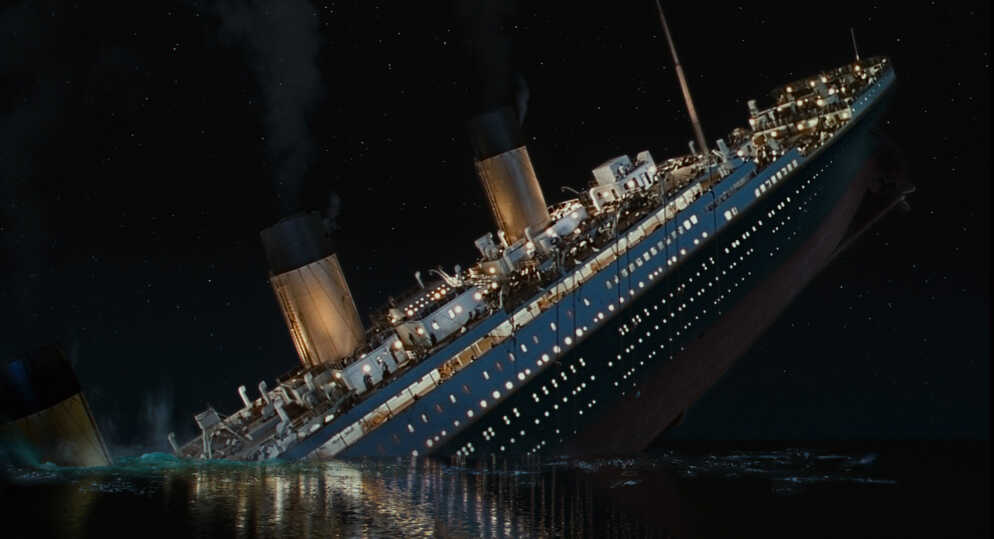

Survived - that's the target, 0 means the passenger did not survive, while 1 means he/she survived.

Pclass - passenger class.

Name, Sex, Age - self-explanatory

SibSp - how many siblings & spouses of the passenger aboard the Titanic.

Parch - how many children & parents of the passenger aboard the Titanic.

Ticket - ticket id

Fare - the price paid (in pounds)

Cabin - passenger's cabin number

Embarked - where the passenger embarked the Titanic

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')

# EDA

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Finding Relation between Inputs and Targets

In [7]:
data.PassengerId.nunique()

891

In [8]:
data.drop(['PassengerId','Name'],axis=1,inplace=True)

In [9]:
grp_data_pclass=data.groupby(["Pclass",'Survived']).count()['Fare']
grp_data_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Fare, dtype: int64

For P CLass 1, 63% People Survived.
__________
For P CLass 2, 47% People Survived.
_________
For P CLass 3, 24% People Survived.
__________

### Thus PClass have a relation with survival.


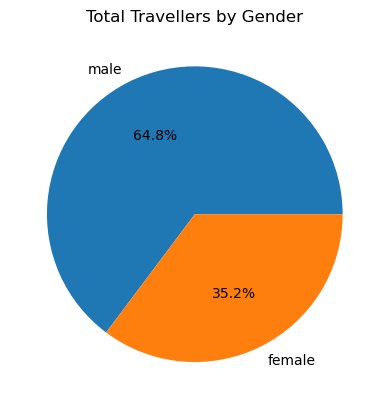

In [10]:
gender=data.Sex.value_counts()

plt.pie(gender,labels=gender.index,autopct='%.1f%%')
plt.title("Total Travellers by Gender")
plt.show()

In [11]:
grp_data_gender=data.groupby(['Sex','Survived']).count()['Fare']
female=grp_data_gender[[('female',0),('female',1)]]
male=grp_data_gender[[('male',0),('male',1)]]
grp_data_gender

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Fare, dtype: int64

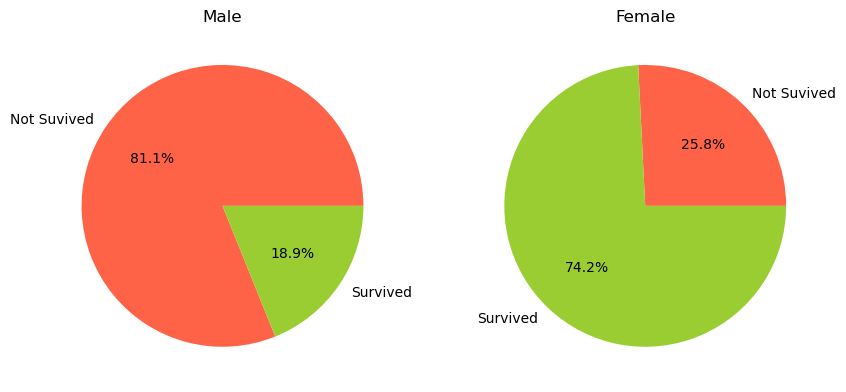

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(male,labels=['Not Suvived','Survived'],autopct='%.1f%%',colors=['tomato','yellowgreen'])
plt.title("Male")
plt.subplot(1,2,2)
plt.pie(female,labels=['Not Suvived','Survived'],autopct='%.1f%%',colors=['tomato','yellowgreen'])
plt.title("Female")
plt.show()

#### Thus, gender has a relation with survival.

In [13]:
data.Age.isna().sum()

177

In [14]:
data[data['Sex']=='male'].Age.median()

29.0

In [15]:
data[data['Sex']=='female'].Age.median()

27.0

In [16]:
data.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [18]:
nan_index=data[data['Age'].isna()].index
for i in range(data.shape[0]):
    if i in nan_index:
        if data.iloc[i,2]=='male':
            if data.iloc[i,1]==1:
                data.iloc[i,3]=40
            elif data.iloc[i,1]==2:
                data.iloc[i,3]=30
            elif data.iloc[i,1]==3:
                data.iloc[i,3]=25
        else:
            if data.iloc[i,1]==1:
                data.iloc[i,3]=35
            elif data.iloc[i,1]==2:
                data.iloc[i,3]=28
            elif data.iloc[i,1]==3:
                data.iloc[i,3]=21.5
            

In [19]:
data.Age.isna().sum()

0

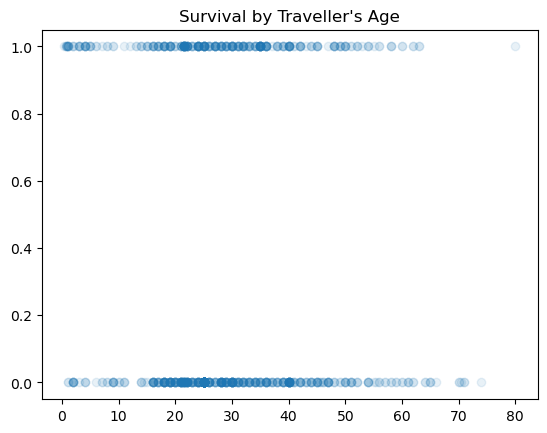

In [20]:
plt.scatter(data.Age,data.Survived,alpha=0.1)
plt.title("Survival by Traveller's Age")

plt.show()

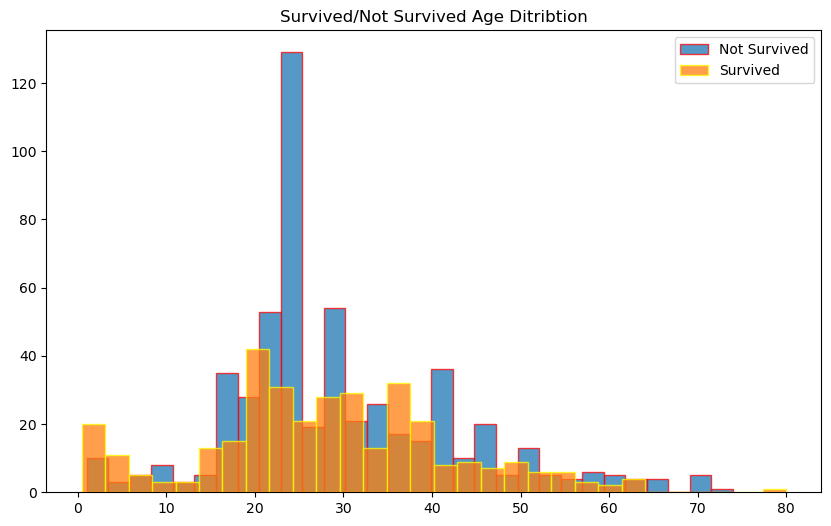

In [21]:
plt.figure(figsize=(10,6))
# plt.subplot(1,2,1)
plt.hist(data[data['Survived']==0]['Age'],bins=30,label='Not Survived',alpha=0.75,edgecolor='red')
# plt.title("Not Survived Age Ditribtion")
# plt.subplot(1,2,2)

plt.hist(data[data['Survived']==1]['Age'],bins=30,label='Survived',alpha=0.75,edgecolor='yellow')
plt.legend()
plt.title("Survived/Not Survived Age Ditribtion")
plt.show()

In [22]:
data[data['Age'].isna()].index

Index([], dtype='int64')

## Thus age has not a strong relation with Survival

In [23]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [24]:
data.groupby(['SibSp','Survived']).count()['Fare']

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Fare, dtype: int64

Persons with 0 siblings or Spouse : (210/604) 34% Survived
_____________
Persons with 1 siblings or Spouse : (112/209) 54% Survived
_____________
Persons with more than 1 siblings or Spouse : (20/74) 27% Survived


### People with no or more than one siblings or spouse had less chance of survival.

In [25]:
data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

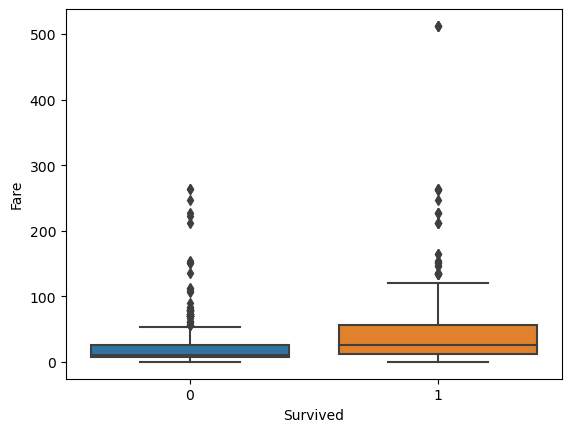

In [26]:
sns.boxplot(x=data.Survived,y=data.Fare)
plt.show()

In [27]:
grp_data_fare=data.groupby('Survived')['Fare'].agg(['mean','median','count','std'])
grp_data_fare

,mean,median,count,std
Survived,,,,
0,22.117887,10.5,549,31.388207
1,48.395408,26.0,342,66.596998


In [28]:
fare_below_avg=data[data['Fare']<data.Fare.mean()]
fare_above_avg=data[data['Fare']>data.Fare.mean()]

In [29]:
fare_below_avg.Survived.value_counts()

Survived
0    464
1    216
Name: count, dtype: int64

In [30]:
fare_above_avg.Survived.value_counts()

Survived
1    126
0     85
Name: count, dtype: int64

60% People who paid above average fare survived.


32% People who paid below average fare survived.




## Thus fare has a relation with Survival.

In [31]:
data.Cabin.nunique()

147

In [32]:
data[data['Cabin'].isna()].Survived.mean()

0.29985443959243085

In [33]:
data[data['Cabin'].isna()==False].Survived.mean()

0.6666666666666666

People who had cabins has more chances of Survival.

In [34]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
data.groupby("Embarked")['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

55% People who embarked from C has survived.

39% People who embarked from Q has survived.

34% People who embarked from S has survived.

In [36]:
data['Embarked']=data['Embarked']

In [37]:
data['Ticket'][700:750]

700             PC 17757
701             PC 17475
702                 2691
703                36864
704               350025
705               250655
706               223596
707             PC 17476
708               113781
709                 2661
710             PC 17482
711               113028
712                19996
713                 7545
714               250647
715               348124
716             PC 17757
717                34218
718                36568
719               347062
720               248727
721               350048
722                12233
723               250643
724               113806
725               315094
726                31027
727                36866
728               236853
729     STON/O2. 3101271
730                24160
731                 2699
732               239855
733                28425
734               233639
735                54636
736           W./C. 6608
737             PC 17755
738               349201
739               349218


# Data Preprocessing

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [39]:
tickets=[]

for i in range(data.shape[0]):
    v=data.iloc[i,6]
    if i<5:
        print(v)
    if 'A/5'in v or 'A./5' in v:
        tickets.append("A/5")
    elif 'PC' in v:
        tickets.append("PC")
    elif 'STON' in v or 'SOTON' in v:
        tickets.append("STON")
    elif 'C.A' in v or 'CA' in v:
        tickets.append("CA")
    elif 'SC' in v or 'SCO' in v:
        tickets.append("SC")
    elif 'W./C' in v or 'W/C' in v or 'WE/P' in v:
        tickets.append("WC")
    elif 'C' in v or 'F.C.C' in v:
        tickets.append("C")
    elif 'PP' in v:
        tickets.append("PP")
    else:
        tickets.append("Normal")

A/5 21171
PC 17599
STON/O2. 3101282
113803
373450


In [40]:
len(tickets)

891

In [41]:
data['Ticket_Category']=tickets

In [42]:
data['Ticket_Category'].value_counts()

Ticket_Category
Normal    682
PC         60
CA         41
STON       36
C          20
A/5        19
SC         14
WC         12
PP          7
Name: count, dtype: int64

In [43]:
data.groupby('Ticket_Category')['Survived'].mean()

Ticket_Category
A/5       0.105263
C         0.400000
CA        0.341463
Normal    0.373900
PC        0.650000
PP        0.714286
SC        0.500000
STON      0.277778
WC        0.166667
Name: Survived, dtype: float64

In [44]:
premium_tickets=[]
for i in range(data.shape[0]):
    if data.loc[i,'Ticket_Category'] in ['PP','PC','SC']:
        premium_tickets.append(1)
    else:
        premium_tickets.append(0)
data['Premium_Ticket']=premium_tickets

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Category,Premium_Ticket
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,PC,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Normal,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Normal,0


In [46]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [47]:
null_cabin=data[data['Cabin'].isna()].index
cabin=[]
for i in range(data.shape[0]):
    if i in null_cabin:
        cabin.append(0)
    else:
        cabin.append(1)


In [48]:
data['is_cabin']=cabin

In [49]:
data.drop(['Ticket','Cabin','Ticket_Category'],axis=1,inplace=True)

In [50]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Premium_Ticket,is_cabin
0,0,3,0,22.0,1,0,7.2500,S,0,0
1,1,1,1,38.0,1,0,71.2833,C,1,1
2,1,3,1,26.0,0,0,7.9250,S,0,0
3,1,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0


In [51]:
data['Embarked']=data['Embarked'].map({"C":3,"Q":2,"S":1})

In [52]:
data.isna().sum()

Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          2
Premium_Ticket    0
is_cabin          0
dtype: int64

In [53]:
data.Embarked.value_counts()

Embarked
1.0    644
3.0    168
2.0     77
Name: count, dtype: int64

In [54]:
data.Embarked.fillna(1.0,inplace=True)

## Splitting data

In [55]:
targets=data['Survived']
inputs=data.drop(['Survived'],axis=1)


scaler=StandardScaler()
scaled_data=data.drop(['Survived'],axis=1)
scaled_data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])
scaled_inputs=scaled_data


X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.25)

# Modeling

##### Model 1 : Scaled Inputs with all columns

In [56]:
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [57]:
reg.score(X_train,y_train),reg.score(X_test,y_test)

(0.8218562874251497, 0.7892376681614349)

In [58]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.425524
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  668
Model:                          Logit   Df Residuals:                      658
Method:                           MLE   Df Model:                            9
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.3607
Time:                        16:17:08   Log-Likelihood:                -284.25
converged:                       True   LL-Null:                       -444.64
Covariance Type:            nonrobust   LLR p-value:                 1.015e-63
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9287      0.566      1.642      0.101      -0.180       2.037
Pclass           

#### Model 2 : Scaled Inputs with Statistically Significant Variables
Deleting 2 Insignificant columns

In [59]:
inputs=data.drop(['Parch','Premium_Ticket'],axis=1)
targets=data['Survived']


scaler=StandardScaler()
scaled_data=inputs.drop(['Survived'],axis=1)
scaled_data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])
scaled_inputs=scaled_data


X_train,X_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2)

In [60]:
reg3=LogisticRegression()
reg3.fit(X_train,y_train)

LogisticRegression()

In [61]:
reg3.score(X_test,y_test)

0.8212290502793296

In [62]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.442170
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.3316
Time:                        16:17:09   Log-Likelihood:                -314.82
converged:                       True   LL-Null:                       -471.03
Covariance Type:            nonrobust   LLR p-value:                 1.347e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4847      0.525      0.923      0.356      -0.545       1.514
Pclass        -1.0316      0.

#### Accuracy is maintained but with two less variables. 

In [63]:
pred=reg3.predict(X_test)

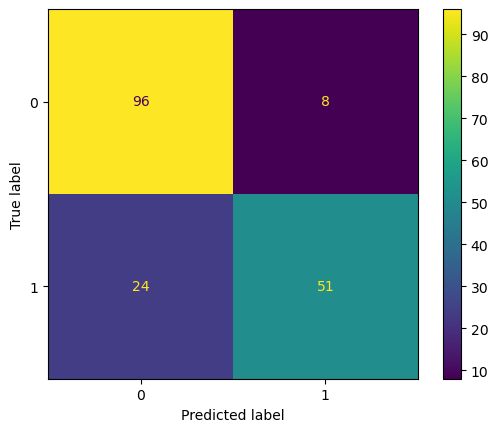

In [65]:
# confusion_matrix(y_test,pred)
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [66]:
pred2=reg3.predict_proba(X_test)

In [95]:
threshold = 0.5
predictions = (pred2 >= threshold).astype(int)[:,1]

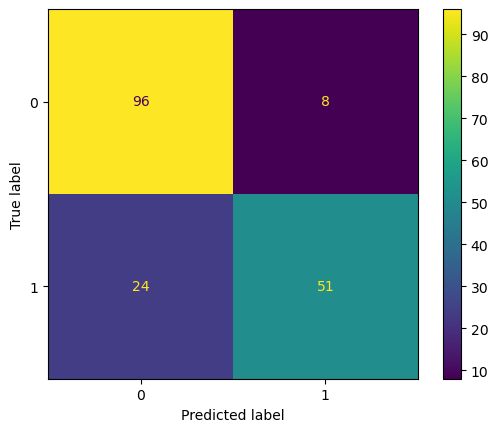

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions)

# Completed Making Titanic Survival Prediction with 80% Test Accuracy.